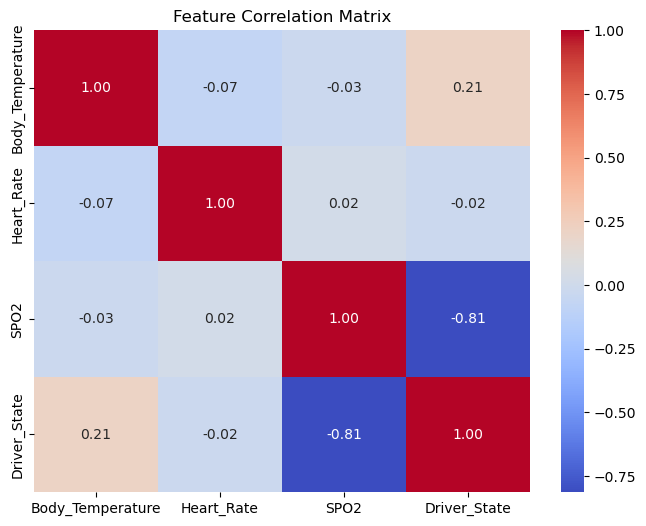

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.92      1.00      0.96        12
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4
           4       1.00      0.71      0.83         7
           5       0.85      0.77      0.81        22
           6       0.86      0.97      0.91        33
           7       0.92      0.94      0.93        50
           8       0.96      0.92      0.94        25
           9       0.98      1.00      0.99        89

    accuracy                           0.93       246
   macro avg       0.95      0.84      0.87       246
weighted avg       0.94      0.93      0.93       246



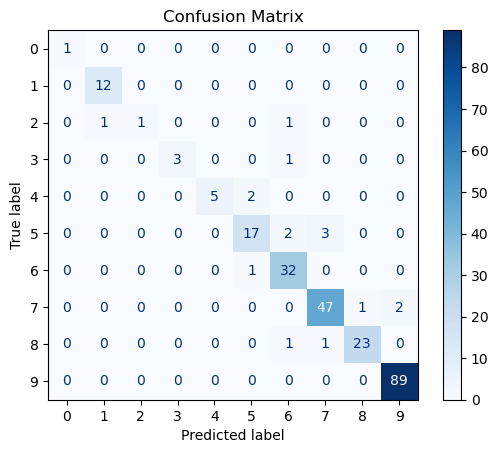

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Emotional State.csv'  # Replace with your file path
data = pd.read_csv(file_path)

data['Body_Temperature'] = (data['Body_Temperature'] - 32) * 5/9

# Separate features and target variable
X = data[['Body_Temperature', 'Heart_Rate', 'SPO2']]
y = data['Driver_State']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize feature correlations
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report_result)

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


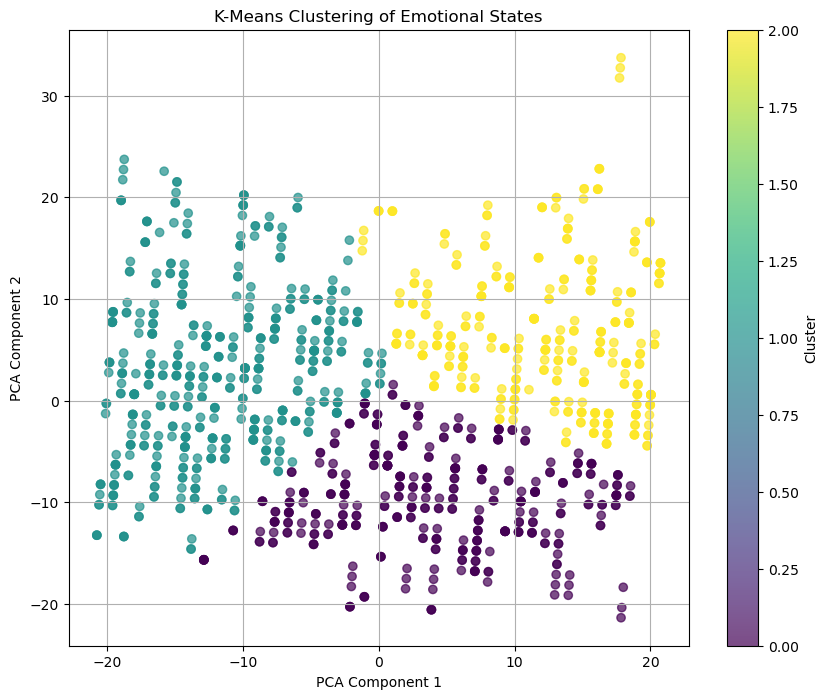

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering of Emotional States')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


In [ ]:
# Example new sample input (replace with actual values)
sample_input = [[37, 72, 95]]  # Example: Body_Temperature, Heart_Rate, SPO2

# Standardize the sample input using the same scaler
sample_input_scaled = scaler.transform(sample_input)

# Predict the Driver_State using the trained model
predicted_state = dt_model.predict(sample_input_scaled)

print(f"The predicted Driver_State for the input {sample_input[0]} is: {predicted_state[0]}")

# Normal = 1-3
# Mild = 4-6
# Stressed = 7-8
# Risk = 9


The predicted Driver_State for the input [37, 72, 95] is: 6


c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
